In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

In [264]:
a = ['a', 'b', 'c']
#np.array(a)
pd.Series(a, index=['gto', 'gro', 'df'])

gto    a
gro    b
df     c
dtype: object

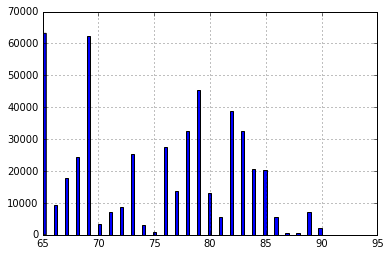

In [265]:
letras = re.compile('[a-z]', flags=re.IGNORECASE)
with open("L3azkaban.txt") as arch:
    l=[]
    for linea in arch.readlines():
        l.extend(letras.findall(linea))
l = pd.Series(l).str.upper()
l = l.apply(ord)
l.hist(bins='auto')

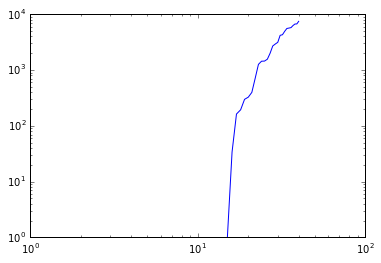

In [271]:
def inicial(palabra):
    if type(palabra) != str:
        return np.NaN
    trad = {'Á':'A', 'É':'E', 'Í':'I', 'Ó':'O', 'Ú':'U', 'Ñ':'N', '0':'Z', '1':'Z', '2':'Z', '3':'Z', '4':'Z', '5':'Z', '6':'Z', '7':'Z', '8':'Z', '9':'Z'}
    p = []
    for l in palabra:
        p.append(trad.get(l, l))
    palabra = ''.join(p)
    if palabra.lower() in ['a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'en', 'entre', 'para', 'por', 'segun', 'sobre', 'tras', 'y', 'o', 'e', 'ni', 
                   'el', 'la', 'los', 'las', 'un', 'uno', 'unos', 'una', 'unas', 'nosotros', 'ustedes', 'ellos', 'su', 'sus', 'que', 'mas', 'suyo', 'suya']:
        return np.NaN
    #print(palabra)
    return ord(palabra[0])

letras = re.compile('\w+', flags=re.IGNORECASE)
with open("L3azkaban.txt") as arch:
    l=[]
    for linea in arch.readlines():
        l.extend(letras.findall(linea))
l = pd.Series(l).str.upper()

l=l.apply(inicial)
l.dropna(inplace=True)

frec = np.histogram(np.array(l), bins='auto')[0]
frec.sort()

plt.xscale("log")
plt.yscale("log")
plt.plot(frec)

In [246]:
calles = pd.read_excel("calles_tabla.xlsx")['NOMVIAL']

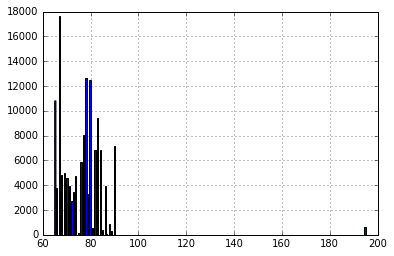

In [253]:
calles.apply(inicial).dropna().hist(bins='auto')